Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [133]:
import pandas as pd
import numpy as np
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [96]:


bixi_stations_df = pd.read_csv('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/bixi_stations_df.csv', index_col=0)
bixi_stations_df.rename(columns= {'id':'station_id'}, inplace=True)
bixi_stations_df.head()

empty_slots  free_bikes                        station_id   latitude  \
0           12           3  36c6491aa1b52e5ef7005f984738de27  45.516926   
1           13           9  65f5707d61306518123222b4680bc282  45.553219   
2           12          17  0e58810dea9e4869279089cb8576642f  45.526890   
3            9           6  eeda0f4010f34ca2199f3585a76fef66  45.553400   
4           15          19  8140fc3c3486abf913b0bd9211926f2b  45.559842   

   longitude                                               name  
0 -73.564257      Gare d'autocars de Montréal (Berri / Ontario)  
1 -73.539782                                 Marché Maisonneuve  
2 -73.572640                                Rachel / de Brébeuf  
3 -73.662255      Bibliothèque d'Ahuntsic (Lajeunesse / Fleury)  
4 -73.615447  Cité des Arts du Cirque (Paul Boutet / des Reg...

In [97]:
bixi_stations_df.shape

(160, 6)

In [99]:
clean_fsq_y_bar_df = pd.read_csv('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/clean_fsq_y_bar_df.csv',index_col=0)
clean_fsq_y_bar_df.head()

bar_id                                  bar_name  \
0  55aedbd9498eb6db5d095733                                 Le 4e Mur   
1  4b0c1ff8f964a520603723e3                             Le Saint Bock   
2  4ad4c06bf964a5203ef920e3  Brasserie Artisanale l'Amère a Boire Inc   
3  56ec4544498e27e294330c2b                                     Cadet   
4  4c1009053ce120a19f6d071c                           Pub l'Ile Noire   

                         station_id  popularity  rating  price  review_count  \
0  36c6491aa1b52e5ef7005f984738de27    0.966045     9.0    3.0          99.0   
1  36c6491aa1b52e5ef7005f984738de27    0.980111     8.3    2.0          36.0   
2  36c6491aa1b52e5ef7005f984738de27    0.960864     8.1    2.0         131.0   
3  36c6491aa1b52e5ef7005f984738de27    0.981131     9.5    2.0          13.0   
4  36c6491aa1b52e5ef7005f984738de27    0.975758     7.8    2.0         129.0   

   total_counts  
0          11.0  
1           9.0  
2           8.0  
3          23.0  
4           6.0

#### Joining the two dataframes:

In [100]:
bar_and_bixi_df = pd.merge(clean_fsq_y_bar_df, bixi_stations_df, on='station_id')
bar_and_bixi_df.to_csv('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/bar_and_bixi_df.csv')
bar_and_bixi_df.head()

bar_id                                  bar_name  \
0  55aedbd9498eb6db5d095733                                 Le 4e Mur   
1  4b0c1ff8f964a520603723e3                             Le Saint Bock   
2  4ad4c06bf964a5203ef920e3  Brasserie Artisanale l'Amère a Boire Inc   
3  56ec4544498e27e294330c2b                                     Cadet   
4  4c1009053ce120a19f6d071c                           Pub l'Ile Noire   

                         station_id  popularity  rating  price  review_count  \
0  36c6491aa1b52e5ef7005f984738de27    0.966045     9.0    3.0          99.0   
1  36c6491aa1b52e5ef7005f984738de27    0.980111     8.3    2.0          36.0   
2  36c6491aa1b52e5ef7005f984738de27    0.960864     8.1    2.0         131.0   
3  36c6491aa1b52e5ef7005f984738de27    0.981131     9.5    2.0          13.0   
4  36c6491aa1b52e5ef7005f984738de27    0.975758     7.8    2.0         129.0   

   total_counts  empty_slots  free_bikes   latitude  longitude  \
0          11.0           12           3  45.516926 -73.564257   
1           9.0           12           3  45.516926 -73.564257   
2           8.0           12           3  45.516926 -73.564257   
3          23.0           12           3  45.516926 -73.564257   
4           6.0           12           3  45.516926 -73.564257   

                                            name  
0  Gare d'autocars de Montréal (Berri / Ontario)  
1  Gare d'autocars de Montréal (Berri / Ontario)  
2  Gare d'autocars de Montréal (Berri / Ontario)  
3  Gare d'autocars de Montréal (Berri / Ontario)  
4  Gare d'autocars de Montréal (Berri / Ontario)

In [101]:

bar_and_bixi_df.shape


(487, 13)

##### Renaming the columns:

In [102]:
print(bar_and_bixi_df.keys())
# Dropping unnecessary columns
columns_to_drop = ['latitude', 'longitude', 'name']

bar_and_bixi_df.drop(columns=columns_to_drop, inplace=True)

# Renaming columns to be more understandable
bar_and_bixi_df.rename(columns={'total_counts': 'num_stations_pinged'}, inplace=True)
bar_and_bixi_df.head()

Index(['bar_id', 'bar_name', 'station_id', 'popularity', 'rating', 'price',
       'review_count', 'total_counts', 'empty_slots', 'free_bikes', 'latitude',
       'longitude', 'name'],
      dtype='object')


bar_id                                  bar_name  \
0  55aedbd9498eb6db5d095733                                 Le 4e Mur   
1  4b0c1ff8f964a520603723e3                             Le Saint Bock   
2  4ad4c06bf964a5203ef920e3  Brasserie Artisanale l'Amère a Boire Inc   
3  56ec4544498e27e294330c2b                                     Cadet   
4  4c1009053ce120a19f6d071c                           Pub l'Ile Noire   

                         station_id  popularity  rating  price  review_count  \
0  36c6491aa1b52e5ef7005f984738de27    0.966045     9.0    3.0          99.0   
1  36c6491aa1b52e5ef7005f984738de27    0.980111     8.3    2.0          36.0   
2  36c6491aa1b52e5ef7005f984738de27    0.960864     8.1    2.0         131.0   
3  36c6491aa1b52e5ef7005f984738de27    0.981131     9.5    2.0          13.0   
4  36c6491aa1b52e5ef7005f984738de27    0.975758     7.8    2.0         129.0   

   num_stations_pinged  empty_slots  free_bikes  
0                 11.0           12           3  
1                  9.0           12           3  
2                  8.0           12           3  
3                 23.0           12           3  
4                  6.0           12           3

##### Adding a column called total_slots and percent_used:

In [104]:
# Adding a column for total slots adding the empty_slots and free_bikes together:
bar_and_bixi_df['total_slots'] = bar_and_bixi_df['empty_slots'] + bar_and_bixi_df['free_bikes']

#Adding a column for the percentage of used bikes:
bar_and_bixi_df['percent_used'] = (100*(bar_and_bixi_df['empty_slots'] / bar_and_bixi_df['total_slots'])).round()
bar_and_bixi_df.head()

bar_id                                  bar_name  \
0  55aedbd9498eb6db5d095733                                 Le 4e Mur   
1  4b0c1ff8f964a520603723e3                             Le Saint Bock   
2  4ad4c06bf964a5203ef920e3  Brasserie Artisanale l'Amère a Boire Inc   
3  56ec4544498e27e294330c2b                                     Cadet   
4  4c1009053ce120a19f6d071c                           Pub l'Ile Noire   

                         station_id  popularity  rating  price  review_count  \
0  36c6491aa1b52e5ef7005f984738de27    0.966045     9.0    3.0          99.0   
1  36c6491aa1b52e5ef7005f984738de27    0.980111     8.3    2.0          36.0   
2  36c6491aa1b52e5ef7005f984738de27    0.960864     8.1    2.0         131.0   
3  36c6491aa1b52e5ef7005f984738de27    0.981131     9.5    2.0          13.0   
4  36c6491aa1b52e5ef7005f984738de27    0.975758     7.8    2.0         129.0   

   num_stations_pinged  empty_slots  free_bikes  total_slots  percent_used  
0                 11.0           12           3           15          80.0  
1                  9.0           12           3           15          80.0  
2                  8.0           12           3           15          80.0  
3                 23.0           12           3           15          80.0  
4                  6.0           12           3           15          80.0

### Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [17]:
print(bar_and_bixi_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bar_name             487 non-null    object 
 1   station_id           487 non-null    object 
 2   popularity           487 non-null    float64
 3   review_count         487 non-null    float64
 4   price                487 non-null    float64
 5   num_stations_pinged  487 non-null    float64
 6   rating               487 non-null    float64
 7   empty_slots          487 non-null    int64  
 8   free_bikes           487 non-null    int64  
 9   total_slots          487 non-null    int64  
 10  percent_used         487 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 42.0+ KB
None


In [18]:
print(bar_and_bixi_df.describe())

       popularity  review_count       price  num_stations_pinged      rating  \
count  487.000000    487.000000  487.000000           487.000000  487.000000   
mean     0.722258     56.753593    1.977413             6.236140    3.867454   
std      0.311972     57.254008    0.592740             5.562189    0.514565   
min      0.005570      1.000000    1.000000             1.000000    1.000000   
25%      0.513637     19.000000    2.000000             2.000000    3.600000   
50%      0.899619     46.000000    2.000000             4.000000    4.000000   
75%      0.964996     76.000000    2.000000             8.000000    4.100000   
max      0.999035    598.000000    4.000000            43.000000    5.000000   

       empty_slots  free_bikes  total_slots  percent_used  
count   487.000000  487.000000   487.000000    487.000000  
mean     14.737166    9.480493    24.217659     59.622177  
std       8.974857    6.183005     8.928031     22.727790  
min       0.000000    0.000000    10.00

##### What immediately stands out to me is that the max number of empty slots and free bikes are really high, 61 empty and 42 free slots. If those are from the same station, that means its a station with 103 total slots which seems high from my experience living in Montreal. There are some stations with a lot but depending on the station name it may or may not make sense

In [105]:
station_most_empty_slots = bar_and_bixi_df.sort_values('empty_slots', ascending=False).head()
station_most_empty_slots


bar_id             bar_name  \
465  4bf71147508c0f476c403d31  BEVO Bar + Pizzeria   
483    DrIGFIi_EB4LGNZH7opJuw   St-Laurent Bifteck   
243  567aba8e498e6b5bdd0ad844        Bar Cloakroom   
252    H_rv7lLUIziHo3ntKjOUuw            Alice Bar   
245  53701414498ec249d96976cc           Brass Door   

                           station_id  popularity  rating  price  \
465  0a3aa715457ea0c777ddd396228eafd1    0.962834     7.6    2.0   
483  b7ea33e5396a99849c76067836da7f21    0.665285     8.0    1.0   
243  69f583a85e1a83b443c203b781bfc0c9    0.975651     8.6    3.0   
252  69f583a85e1a83b443c203b781bfc0c9    0.981226     8.0    2.0   
245  69f583a85e1a83b443c203b781bfc0c9    0.963233     8.0    1.0   

     review_count  num_stations_pinged  empty_slots  free_bikes  total_slots  \
465         174.0                  1.0           61          20           81   
483          51.0                  2.0           41           5           46   
243         182.0                 14.0           39           9           48   
252           3.0                 18.0           39           9           48   
245          29.0                  6.0           39           9           48   

     percent_used  
465          75.0  
483          89.0  
243          81.0  
252          81.0  
245          81.0

##### It does make sense, that spot is the big bixi hub for the Old Port which is along the canal (a very pretty bike ride) and also a major tourist attraction.

In [106]:
analysis_df = bar_and_bixi_df.copy()
#I have the bixi and FS original dataframes, and there are no duplicates in either so there are none in the join
# So I can make a DF with just the data that quantitative data so that I can do visualizations to explore some of the relationships and initial patterns

analysis_df.drop(columns='station_id', inplace=True)
analysis_df.head()




bar_id                                  bar_name  \
0  55aedbd9498eb6db5d095733                                 Le 4e Mur   
1  4b0c1ff8f964a520603723e3                             Le Saint Bock   
2  4ad4c06bf964a5203ef920e3  Brasserie Artisanale l'Amère a Boire Inc   
3  56ec4544498e27e294330c2b                                     Cadet   
4  4c1009053ce120a19f6d071c                           Pub l'Ile Noire   

   popularity  rating  price  review_count  num_stations_pinged  empty_slots  \
0    0.966045     9.0    3.0          99.0                 11.0           12   
1    0.980111     8.3    2.0          36.0                  9.0           12   
2    0.960864     8.1    2.0         131.0                  8.0           12   
3    0.981131     9.5    2.0          13.0                 23.0           12   
4    0.975758     7.8    2.0         129.0                  6.0           12   

   free_bikes  total_slots  percent_used  
0           3           15          80.0  
1           3           15          80.0  
2           3           15          80.0  
3           3           15          80.0  
4           3           15          80.0

In [35]:
print(analysis_df.shape)
analysis_df.head()

(487, 11)


bar_id                                  bar_name  \
0  55aedbd9498eb6db5d095733                                 Le 4e Mur   
1  4b0c1ff8f964a520603723e3                             Le Saint Bock   
2  4ad4c06bf964a5203ef920e3  Brasserie Artisanale l'Amère a Boire Inc   
3  56ec4544498e27e294330c2b                                     Cadet   
4  4c1009053ce120a19f6d071c                           Pub l'Ile Noire   

   popularity  rating  price  review_count  num_stations_pinged  empty_slots  \
0        0.97     8.5    3.0          99.0                 11.0           12   
1        0.98     8.3    2.0          67.0                  9.0           12   
2        0.96     8.1    2.0         113.0                  8.0           12   
3        0.98     9.5    2.0         131.0                 23.0           12   
4        0.98     7.8    2.0         191.0                  6.0           12   

   free_bikes  total_slots  percent_used  
0           3           15          80.0  
1           3           15          80.0  
2           3           15          80.0  
3           3           15          80.0  
4           3           15          80.0

In [107]:
# Round the popularity column so that it is less grannular, I'll use 2 decimal places after the 0: 
analysis_df['popularity'] = analysis_df['popularity'].round(2)
analysis_df.head()

bar_id                                  bar_name  \
0  55aedbd9498eb6db5d095733                                 Le 4e Mur   
1  4b0c1ff8f964a520603723e3                             Le Saint Bock   
2  4ad4c06bf964a5203ef920e3  Brasserie Artisanale l'Amère a Boire Inc   
3  56ec4544498e27e294330c2b                                     Cadet   
4  4c1009053ce120a19f6d071c                           Pub l'Ile Noire   

   popularity  rating  price  review_count  num_stations_pinged  empty_slots  \
0        0.97     9.0    3.0          99.0                 11.0           12   
1        0.98     8.3    2.0          36.0                  9.0           12   
2        0.96     8.1    2.0         131.0                  8.0           12   
3        0.98     9.5    2.0          13.0                 23.0           12   
4        0.98     7.8    2.0         129.0                  6.0           12   

   free_bikes  total_slots  percent_used  
0           3           15          80.0  
1           3           15          80.0  
2           3           15          80.0  
3           3           15          80.0  
4           3           15          80.0

In [108]:
analysis_df.to_csv('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/analysis_df.csv')
analysis_df = pd.read_csv('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/analysis_df.csv', index_col=0)
analysis_df.head()

bar_id                                  bar_name  \
0  55aedbd9498eb6db5d095733                                 Le 4e Mur   
1  4b0c1ff8f964a520603723e3                             Le Saint Bock   
2  4ad4c06bf964a5203ef920e3  Brasserie Artisanale l'Amère a Boire Inc   
3  56ec4544498e27e294330c2b                                     Cadet   
4  4c1009053ce120a19f6d071c                           Pub l'Ile Noire   

   popularity  rating  price  review_count  num_stations_pinged  empty_slots  \
0        0.97     9.0    3.0          99.0                 11.0           12   
1        0.98     8.3    2.0          36.0                  9.0           12   
2        0.96     8.1    2.0         131.0                  8.0           12   
3        0.98     9.5    2.0          13.0                 23.0           12   
4        0.98     7.8    2.0         129.0                  6.0           12   

   free_bikes  total_slots  percent_used  
0           3           15          80.0  
1           3           15          80.0  
2           3           15          80.0  
3           3           15          80.0  
4           3           15          80.0

#### Checking out how different colums effect rating:

In [148]:
#RATING:
# The top 25 rated bars:
top_25_rated_bars = analysis_df.sort_values('rating', ascending=False).head(25)
top_25_rated_bars
# The bottom 25 rated bars:
bottom_25_rated_bars = analysis_df.sort_values('rating', ascending=True).head(25)
bottom_25_rated_bars

#PERCENT USED:
# The top 25 rated bars:
top_25_busy_stations = analysis_df.sort_values('percent_used', ascending=False).head(25)
top_25_busy_stations
# The bottom 25 rated bars:
bottom_25_busy_stations = analysis_df.sort_values('percent_used', ascending=True).head(25)
bottom_25_busy_stations



bar_id                     bar_name  popularity  \
373  4ad92b8ef964a520cc1821e3       Helm Brasseur Gourmand        0.96   
444  4addf655f964a520c66621e3                Thomson House        0.97   
348  568bc64e498ec34f4d922bab             Autos Lajeunesse        0.03   
347  d43ce92f4263431eb76f18f5   Raphaël Bistrot Bar à Vins        0.90   
351  61689accf0825425f7f3c223                         Etna        0.89   
350  627f0d9a7b019300c0336743                   Chez Josie        0.97   
349  6122bffc6f4b773f2d181e56                  Le Petit 26        0.57   
346  4e6aa917d4c01ce017ad2ab9         Le Off Miss Villeray        0.77   
262  4ae0e7f9f964a520928321e3                      Pullman        0.97   
266    koG71Tmokay8IBV580qanA                       Blvd44        0.67   
268    bI28nvujPldWdWsQ5sVRlQ                Apartment 200        0.33   
265    SfHE6qK6dT7wxX-Ow82tRg                  Café Parvis        0.23   
264  52d731d011d2a0079c930734                        Biiru        0.97   
267    LxiwqfN59A1pDdYd7NyJQQ                        Biirū        0.03   
263  4b6e6475f964a52081bb2ce3         McKibbin's Irish Pub        0.99   
261  4ae4d07df964a520669e21e3                      Benelux        0.99   
339  4bf5fa98abdaef3bde2ba184          Tattoo Box Montreal        0.89   
338  4ad4c06af964a52010f920e3                       Else's        0.95   
289  4ed948e0c2ee3cd6444a7e19                   Bande Paul        0.59   
288  5271be1911d2c6270f077c3f              Cozmos Café Bar        0.99   
290  4c1e1ffffcf8c9b684bbac0b                 Bar Sportivo        0.94   
286  4ca6c3a1a6e08cfa74517e94                  Bar Pam Pam        0.82   
287  b08bbcc843104ea1d6b02c3b                     Ritz Bar        0.46   
452  550b5c1f498ed654c5c0df00  Broue Pub Brouhaha Papineau        1.00   
396  598528d34c954c7964d137f1               Arabica Lounge        0.97   

     rating  price  review_count  num_stations_pinged  empty_slots  \
373     7.4    2.0          55.0                  1.0            0   
444     8.0    2.0         111.0                  1.0            3   
348     8.2    2.0         222.0                  4.0            2   
347     8.2    2.0         212.0                  2.0            2   
351     8.2    2.0         152.0                  2.0            2   
350     8.2    3.0         214.0                  2.0            2   
349     8.2    2.0          72.0                  4.0            2   
346     8.2    3.0         166.0                  3.0            2   
262     8.0    2.0         204.0                 16.0            3   
266     5.0    2.0          26.0                  5.0            3   
268     6.0    2.0          72.0                  6.0            3   
265     8.0    2.0         223.0                 12.0            3   
264     8.2    2.0          46.0                 11.0            3   
267     8.0    2.0         191.0                 12.0            3   
263     7.0    2.0          62.0                 14.0            3   
261     8.0    1.0         127.0                 11.0            3   
339     8.0    2.0          39.0                  3.0            3   
338     9.0    2.0         122.0                  8.0            3   
289     8.2    2.0          86.0                  3.0            6   
288     8.2    1.0          11.0                  4.0            6   
290     5.7    1.0          93.0                  1.0            6   
286     8.2    1.0          18.0                  4.0            6   
287     8.2    2.0          12.0                  2.0            6   
452     6.9    2.0          87.0                  1.0            3   
396     7.5    1.0         190.0                  2.0            4   

     free_bikes  total_slots  percent_used  
373          19           19           0.0  
444          42           45           7.0  
348          13           15          13.0  
347          13           15          13.0  
351          13           15          13.0  
350    

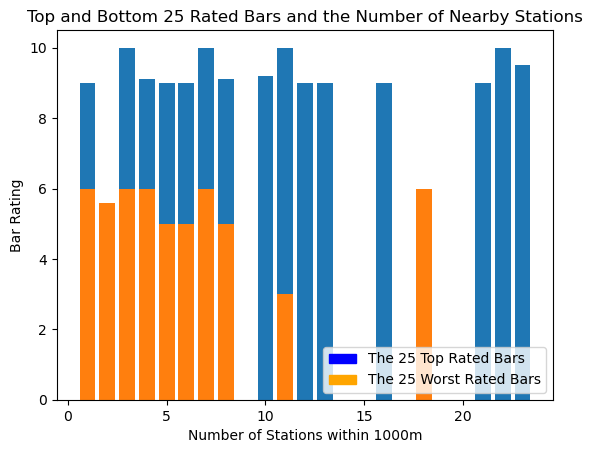

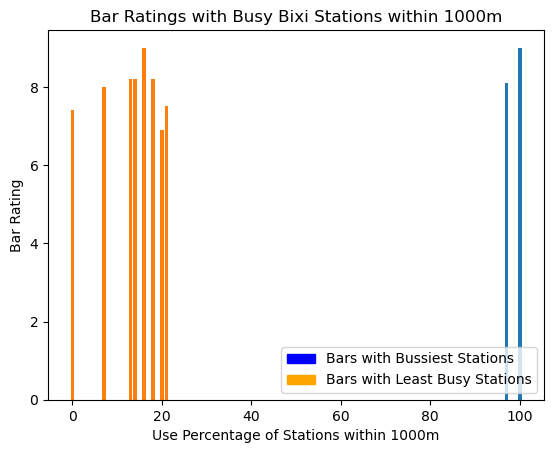

In [193]:
# Best and Worst rated bars and the number of nearby stations:
fig, ax = plt.subplots()
x1 = top_25_rated_bars.num_stations_pinged
y1 = top_25_rated_bars.rating
x2 = bottom_25_rated_bars.num_stations_pinged
y2 = bottom_25_rated_bars.rating
plt.xlabel('Number of Stations within 1000m')
plt.ylabel('Bar Rating')
plt.title('Top and Bottom 25 Rated Bars and the Number of Nearby Stations')
plt.bar(x1, y1)
plt.bar(x2, y2)
blue_patch = mpatches.Patch(color='blue', label='The 25 Top Rated Bars')
orange_patch = mpatches.Patch(color='orange', label='The 25 Worst Rated Bars')
ax.legend(handles=[blue_patch, orange_patch], loc='lower right')
plt.show()

# Most and Least popular bars and the number of nearby stations:
fig, ax = plt.subplots()
top_used_stations_x = top_25_busy_stations.percent_used
top_used_stations_y = top_25_busy_stations.rating
bottom_used_stations_x = bottom_25_busy_stations.percent_used
bottom_used_stations_y = bottom_25_busy_stations.rating
plt.xlabel('Use Percentage of Stations within 1000m')
plt.ylabel('Bar Rating')
plt.title('Bar Ratings with Busy Bixi Stations within 1000m')
plt.bar(top_used_stations_x, top_used_stations_y)
plt.bar(bottom_used_stations_x, bottom_used_stations_y)
blue_patch = mpatches.Patch(color='blue', label='Bars with Bussiest Stations ')
orange_patch = mpatches.Patch(color='orange', label='Bars with Least Busy Stations')
ax.legend(handles=[blue_patch, orange_patch], loc='lower right')
plt.show()



#Saving the visualization to an image:
    # Saved using the small icon next to the visualizations 


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [174]:
# Getting the bixi stations df read for SQLite
bixi_stations_df = pd.read_csv('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/bixi_stations_df.csv', index_col=0)
bixi_stations_df = bixi_stations_df[['id', 'name', 'empty_slots', 'free_bikes', 'latitude', 'longitude']]

#Renaming the bixi's 'id' column as 'station_id': 
bixi_stations_df.rename(columns={'id':'station_id'}, inplace=True)


bixi_stations_df.head()

station_id  \
0  36c6491aa1b52e5ef7005f984738de27   
1  65f5707d61306518123222b4680bc282   
2  0e58810dea9e4869279089cb8576642f   
3  eeda0f4010f34ca2199f3585a76fef66   
4  8140fc3c3486abf913b0bd9211926f2b   

                                                name  empty_slots  free_bikes  \
0      Gare d'autocars de Montréal (Berri / Ontario)           12           3   
1                                 Marché Maisonneuve           13           9   
2                                Rachel / de Brébeuf           12          17   
3      Bibliothèque d'Ahuntsic (Lajeunesse / Fleury)            9           6   
4  Cité des Arts du Cirque (Paul Boutet / des Reg...           15          19   

    latitude  longitude  
0  45.516926 -73.564257  
1  45.553219 -73.539782  
2  45.526890 -73.572640  
3  45.553400 -73.662255  
4  45.559842 -73.615447

In [165]:
# Getting the Foursquare bar df ready for SQLite
clean_foursquare_bar_df = pd.read_csv('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/clean_foursquare_bar_df.csv', index_col=0)


clean_foursquare_bar_df.head()

fsq_id                                  bar_name  \
0  55aedbd9498eb6db5d095733                                 Le 4e Mur   
1  4b0c1ff8f964a520603723e3                             Le Saint Bock   
2  4ad4c06bf964a5203ef920e3  Brasserie Artisanale l'Amère a Boire Inc   
3  56ec4544498e27e294330c2b                                     Cadet   
4  4c1009053ce120a19f6d071c                           Pub l'Ile Noire   

                         station_id  popularity  price  rating  total_counts  
0  36c6491aa1b52e5ef7005f984738de27    0.966045    3.0     8.5            11  
1  36c6491aa1b52e5ef7005f984738de27    0.980111    2.0     8.3             9  
2  36c6491aa1b52e5ef7005f984738de27    0.960864    2.0     8.1             8  
3  36c6491aa1b52e5ef7005f984738de27    0.981131    2.0     9.5            23  
4  36c6491aa1b52e5ef7005f984738de27    0.975758    2.0     7.8             6

In [166]:
# Getting the Yelp bar df ready for SQLite
clean_yelp_bar_df = pd.read_csv('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/clean_yelp_bar_df.csv', index_col=0)

clean_yelp_bar_df.head()

y_id              bar_name  \
0  EQCd_CUFrK_gSARL7s01fw   La Distillerie No.1   
1  RO32EAy8IfnWAm04vCPmzA             Le 4e Mur   
2  XQDWifQPvL2R_c3ptJ8D2g  Randolph Pub Ludique   
3  hdJlf4YNdDtQA67nXvFeyw            Arcade MTL   
4  SbFWAF3Rhtb-vvl5WUqg_A               Yer'Mad   

                         station_id  review_count  rating  price  total_counts  
0  36c6491aa1b52e5ef7005f984738de27         315.0     4.5    2.0            21  
1  36c6491aa1b52e5ef7005f984738de27          99.0     4.5    2.0            17  
2  36c6491aa1b52e5ef7005f984738de27          96.0     4.5    2.0            16  
3  36c6491aa1b52e5ef7005f984738de27          26.0     4.5    1.0            13  
4  36c6491aa1b52e5ef7005f984738de27          15.0     4.5    1.0            11

## SQLite:

In [167]:

# Creating a connection to SQLite and Creating the Database
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/bar_and_bixi.db')
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection("bar_and_bixi.db")

Connection to SQLite DB successful


In [168]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

### CREATING THE TABLES:

In [169]:
create_bixi_stations_table = """
CREATE TABLE IF NOT EXISTS bixi_stations (
  station_id TEXT PRIMARY KEY,
  name TEXT NOT NULL,
  empty_slots INTEGER,
  free_bikes INTEGER,
  latitude FLOAT,
  longitude FLOAT
)
"""
execute_query(connection, create_bixi_stations_table)


Query executed successfully


In [170]:
create_foursquare_bar_table = """
CREATE TABLE IF NOT EXISTS foursquare_bar_data (
    fsq_id TEXT PRIMARY KEY,
    bar_name TEXT NOT NULL,
    station_id TEXT NOT NULL,
    popularity FLOAT,
    price INTEGER,
    rating FLOAT,
    total_counts INTEGER,
    FOREIGN KEY (station_id) REFERENCES bixi_stations (station_id) 
)
"""

create_yelp_bar_table = """
CREATE TABLE IF NOT EXISTS yelp_bar_data (
  y_id TEXT PRIMARY KEY,
  bar_name TEXT NOT NULL,
  station_id TEXT NOT NULL,
  review_count INTEGER,
  price INTEGER,
  rating FLOAT,
  total_counts INTEGER,
  FOREIGN KEY (station_id) REFERENCES bixi_stations (station_id)
    
)
"""
execute_query(connection, create_foursquare_bar_table)
execute_query(connection, create_yelp_bar_table)

Query executed successfully
Query executed successfully


### UPLOADING THE DATA:

In [172]:
import pandas as pd
import sqlite3

try:
    # Step 1: Read the CSV file
    bixi_stations_df = pd.read_csv('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/bixi_stations_df.csv')
    clean_yelp_bar_df = pd.read_csv('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/clean_yelp_bar_df.csv')
    clean_fs_bar_df = pd.read_csv('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/clean_foursquare_bar_df.csv')

    #  Establish a connection to the SQLite database
    connection = sqlite3.connect('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/bar_and_bixi.db')

    # Load the DataFrame into an SQLite table
    bixi_stations_df.to_sql('bixi_stations', connection, if_exists='replace', index=False)
    clean_yelp_bar_df.to_sql('yelp_bar_data', connection, if_exists='replace', index=False)
    clean_fs_bar_df.to_sql('foursquare_bar_data', connection, if_exists='replace', index=False)

except Exception as e:
    print("An error occurred:", e)

finally:
   #Close the connection
    connection.close()

In [178]:
# Connect to SQLite database 
conn = sqlite3.connect('/Users/zachrosenthal/Desktop/Data Science/PYTHON/KATAS/Jupyter Notebooks/Statistical-Modelling-Project/data/bar_and_bixi.db') 
  
# Create cursor object 
cursor = conn.cursor() 
  
# Query for INNER JOIN 
join_tables_yelp_and_bixi = ''' SELECT * 
FROM bixi_stations
JOIN yelp_bar_data
ON station_id = station_id;
'''
  
# Executing the query 
cursor.execute(join_tables_yelp_and_bixi) 
  
# Fetching rows from the result table 
result = cursor.fetchall() 
for row in result: 
    print(row) 
  
# Closing the connection 
conn.close() 

(0, 12, 3, '36c6491aa1b52e5ef7005f984738de27', 45.516926210319546, -73.56425732374191, "Gare d'autocars de Montréal (Berri / Ontario)", 0, 'EQCd_CUFrK_gSARL7s01fw', 'La Distillerie No.1', '36c6491aa1b52e5ef7005f984738de27', 315.0, 4.5, 2.0, 21)
(1, 13, 9, '65f5707d61306518123222b4680bc282', 45.55321884238814, -73.53978216648102, 'Marché Maisonneuve', 0, 'EQCd_CUFrK_gSARL7s01fw', 'La Distillerie No.1', '36c6491aa1b52e5ef7005f984738de27', 315.0, 4.5, 2.0, 21)
(2, 12, 17, '0e58810dea9e4869279089cb8576642f', 45.52689, -73.57264, 'Rachel / de Brébeuf', 0, 'EQCd_CUFrK_gSARL7s01fw', 'La Distillerie No.1', '36c6491aa1b52e5ef7005f984738de27', 315.0, 4.5, 2.0, 21)
(3, 9, 6, 'eeda0f4010f34ca2199f3585a76fef66', 45.5534000891078, -73.66225451231003, "Bibliothèque d'Ahuntsic (Lajeunesse / Fleury)", 0, 'EQCd_CUFrK_gSARL7s01fw', 'La Distillerie No.1', '36c6491aa1b52e5ef7005f984738de27', 315.0, 4.5, 2.0, 21)
(4, 15, 19, '8140fc3c3486abf913b0bd9211926f2b', 45.55984236120471, -73.61544728279114, 'Cité de